<a href="https://colab.research.google.com/github/ThuanPhong0126/CS114.K21/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thuanphong","key":"ffc8cd53940c5c0bf1c827618250572d"}'}

In [0]:
!pip install kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list -s smartphone

ref                                                        title                                                size  lastUpdated          downloadCount  
---------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
uciml/human-activity-recognition-with-smartphones          Human Activity Recognition with Smartphones          25MB  2019-11-13 20:04:13          16289  
malekzadeh/motionsense-dataset                             MotionSense Dataset : Smartphone Sensor Data - HAR   72MB  2018-03-15 20:50:21           4504  
mboaglio/simplifiedhuarus                                  Simplified Human Activity Recognition w/Smartphone    5MB  2018-01-04 18:28:35           2354  
sasanj/human-activity-smart-devices                        An Open Dataset for Human Activity Analysis         129MB  2017-09-01 07:30:59           2481  
saadalsharif/smartphone                                    SmartPhone 

In [0]:
pwd

'/content'

In [0]:
cd /content/drive/My Drive/Colab Notebooks/SVM

/content/drive/My Drive/Colab Notebooks/SVM


In [0]:
pwd

'/content/drive/My Drive/Colab Notebooks/SVM'

In [0]:
!kaggle datasets download -d uciml/human-activity-recognition-with-smartphones

human-activity-recognition-with-smartphones.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
!matplotlib inline
import pandas as pd
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [0]:
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/SVM/human-activity-recognition-with-smartphones/train.csv')
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/SVM/human-activity-recognition-with-smartphones/test.csv')

In [0]:
train=shuffle(train)
test=shuffle(test)

In [0]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
1814,0.315652,0.000170,-0.137874,-0.924139,-0.909384,-0.935356,-0.932319,-0.902911,-0.926233,-0.874314,-0.511839,-0.819209,0.719965,0.680366,0.804361,-0.914184,-0.996523,-0.997555,-0.995964,-0.942976,-0.907519,-0.908483,0.252310,-0.065019,-0.562519,-0.124895,0.139606,-0.323844,0.220710,0.010528,-0.137962,0.003534,0.426226,0.087033,-0.038524,-0.129098,-0.012013,0.630346,-0.682094,-0.845151,...,-0.798901,-1.000000,-0.417710,-0.501718,-0.873314,-0.858976,-0.832483,-0.848108,-0.823181,-0.935047,-0.858976,-0.984098,-0.938784,-0.334032,-1.000000,-0.048984,0.047502,-0.313768,-0.955330,-0.960977,-0.956055,-0.968154,-0.976026,-0.955330,-0.998927,-0.951695,-0.496953,-0.936508,0.229713,-0.379087,-0.746010,0.268693,-0.329071,-0.282646,0.300281,0.568405,-0.132431,-0.888570,8,LAYING
6727,0.282723,0.015372,-0.048217,-0.108118,-0.031452,-0.121290,-0.108164,-0.088095,-0.136021,-0.095175,0.081955,0.192852,0.118772,-0.037844,0.555528,-0.008049,-0.601195,-0.816510,-0.647087,-0.111759,-0.338948,-0.200900,0.410062,0.312093,0.122419,-0.122705,0.012677,-0.164663,0.496198,-0.050636,0.110622,0.171398,-0.147963,-0.073684,0.064900,0.167307,-0.312283,0.015111,0.193938,0.632919,...,0.496355,-0.968254,-0.073421,-0.378971,-0.793656,-0.416405,-0.403185,-0.362378,-0.580047,-0.658448,-0.416405,-0.781585,-0.531147,0.529747,-0.846154,-0.033656,-0.393791,-0.766056,-0.638452,-0.623160,-0.616078,-0.693137,-0.930958,-0.638452,-0.926902,-0.667760,0.291291,-0.873016,0.172514,-0.146878,-0.603889,-0.029141,-0.668574,0.746277,-0.187921,-0.845274,0.171320,-0.063817,29,WALKING
3507,0.281083,-0.013856,-0.114890,-0.989299,-0.973738,-0.955450,-0.988964,-0.970588,-0.948153,-0.934996,-0.566987,-0.805405,0.844079,0.686372,0.830864,-0.972186,-0.999895,-0.999749,-0.998434,-0.987628,-0.970646,-0.941398,-0.406956,-0.425055,-0.393568,0.138027,-0.011310,-0.315448,0.210797,0.259654,-0.391195,0.728333,-0.689936,0.072392,-0.074163,0.050907,-0.144193,0.756386,-0.817000,-0.835951,...,-1.000000,-1.000000,0.340474,-0.367702,-0.684392,-0.981974,-0.981593,-0.980450,-0.980007,-0.999478,-0.981974,-0.999727,-0.97315

In [0]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
2278,0.276511,-0.018810,-0.119871,-0.953299,-0.780654,-0.879997,-0.958216,-0.805121,-0.866379,-0.875769,-0.474278,-0.766899,0.791170,0.500150,0.787296,-0.887533,-0.998715,-0.990029,-0.991816,-0.963693,-0.859172,-0.843243,-0.058184,-0.084735,-0.184510,-0.184719,0.093137,0.163023,0.114017,0.041984,-0.302993,0.652823,-0.129796,-0.287117,0.136054,0.005601,-0.007870,0.642381,-0.060918,-0.091079,...,-0.498935,-1.000000,-0.037840,-0.272606,-0.625427,-0.926756,-0.897040,-0.893036,-0.914853,-0.987883,-0.926756,-0.994412,-0.926349,-0.244624,-0.897436,-0.503744,-0.267797,-0.656565,-0.960802,-0.955281,-0.946177,-0.966969,-0.977797,-0.960802,-0.998958,-0.939707,-0.464781,-1.000000,-0.517457,-0.424395,-0.804190,0.152948,-0.397973,-0.130808,0.364002,-0.816847,0.110533,-0.114868,20,SITTING
909,0.276980,-0.015782,-0.133574,-0.947892,-0.800856,-0.926280,-0.959542,-0.820173,-0.929098,-0.850962,-0.360866,-0.760312,0.756840,0.615803,0.794182,-0.906133,-0.998426,-0.991711,-0.995635,-0.972278,-0.858125,-0.933548,-0.057313,-0.141224,-0.514051,0.660058,-0.149730,0.238797,0.516260,0.076463,-0.237933,0.654640,-0.227437,-0.155145,0.139766,0.000288,-0.099119,0.054877,-0.270453,0.413349,...,-0.405840,-1.000000,0.086949,-0.351497,-0.712362,-0.883168,-0.892603,-0.884048,-0.914835,-0.935771,-0.883168,-0.991939,-0.919083,-0.088627,-1.000000,0.012853,-0.428598,-0.781774,-0.928580,-0.927367,-0.915444,-0.941771,-0.990618,-0.928580,-0.997044,-0.903129,-0.270574,-1.000000,-0.280370,-0.363190,-0.738101,0.076903,-0.061073,0.641724,0.700229,-0.812140,0.214665,-0.041635,10,STANDING
1720,0.278437,-0.015224,-0.110079,-0.997648,-0.967727,-0.987189,-0.998026,-0.965869,-0.986970,-0.940170,-0.562678,-0.822009,0.848548,0.682085,0.839854,-0.987579,-0.999987,-0.999672,-0.999745,-0.997535,-0.972343,-0.987163,-0.644387,-0.408836,-0.573584,0.329790,-0.104419,0.098121,0.002528,0.188388,-0.162978,0.094865,0.019543,0.126111,-0.084194,0.213717,-0.312746,0.379843,0.241112,0.445172,...,-1.000000,-0.936508,0.633945,-0.694982,-0.918859,-0.988835,-0.980075,-0.984304,-0.977572,-0.998165,-0.988835,-0.999766,-0

In [0]:
train_out=pd.crosstab(index=train['Activity'],columns='count')
train_out

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


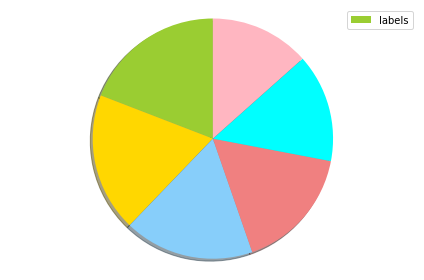

In [0]:
temp = train["Activity"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

labels = ['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [0]:
X_train=pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train_label=train.Activity.values.astype(object)
X_test=pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test_label=test.Activity.values.astype(object)

In [0]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
1814,0.315652,0.000170,-0.137874,-0.924139,-0.909384,-0.935356,-0.932319,-0.902911,-0.926233,-0.874314,-0.511839,-0.819209,0.719965,0.680366,0.804361,-0.914184,-0.996523,-0.997555,-0.995964,-0.942976,-0.907519,-0.908483,0.252310,-0.065019,-0.562519,-0.124895,0.139606,-0.323844,0.220710,0.010528,-0.137962,0.003534,0.426226,0.087033,-0.038524,-0.129098,-0.012013,0.630346,-0.682094,-0.845151,...,-0.998726,-0.956426,-0.798901,-1.000000,-0.417710,-0.501718,-0.873314,-0.858976,-0.832483,-0.848108,-0.823181,-0.935047,-0.858976,-0.984098,-0.938784,-0.334032,-1.000000,-0.048984,0.047502,-0.313768,-0.955330,-0.960977,-0.956055,-0.968154,-0.976026,-0.955330,-0.998927,-0.951695,-0.496953,-0.936508,0.229713,-0.379087,-0.746010,0.268693,-0.329071,-0.282646,0.300281,0.568405,-0.132431,-0.888570
6727,0.282723,0.015372,-0.048217,-0.108118,-0.031452,-0.121290,-0.108164,-0.088095,-0.136021,-0.095175,0.081955,0.192852,0.118772,-0.037844,0.555528,-0.008049,-0.601195,-0.816510,-0.647087,-0.111759,-0.338948,-0.200900,0.410062,0.312093,0.122419,-0.122705,0.012677,-0.164663,0.496198,-0.050636,0.110622,0.171398,-0.147963,-0.073684,0.064900,0.167307,-0.312283,0.015111,0.193938,0.632919,...,-0.574600,-0.169450,0.496355,-0.968254,-0.073421,-0.378971,-0.793656,-0.416405,-0.403185,-0.362378,-0.580047,-0.658448,-0.416405,-0.781585,-0.531147,0.529747,-0.846154,-0.033656,-0.393791,-0.766056,-0.638452,-0.623160,-0.616078,-0.693137,-0.930958,-0.638452,-0.926902,-0.667760,0.291291,-0.873016,0.172514,-0.146878,-0.603889,-0.029141,-0.668574,0.746277,-0.187921,-0.845274,0.171320,-0.063817
3507,0.281083,-0.013856,-0.114890,-0.989299,-0.973738,-0.955450,-0.988964,-0.970588,-0.948153,-0.934996,-0.566987,-0.805405,0.844079,0.686372,0.830864,-0.972186,-0.999895,-0.999749,-0.998434,-0.987628,-0.970646,-0.941398,-0.406956,-0.425055,-0.393568,0.138027,-0.011310,-0.315448,0.210797,0.259654,-0.391195,0.728333,-0.689936,0.072392,-0.074163,0.050907,-0.144193,0.756386,-0.817000,-0.835951,...,-0.999878,-0.986747,-1.000000,-1.000000,0.340474,-0.367702,-0.684392,

In [0]:
Y_train_label

array(['LAYING', 'WALKING', 'LAYING', ..., 'SITTING', 'WALKING',
       'WALKING'], dtype=object)

In [0]:
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
encoder.fit(Y_train_label)
Y_train=encoder.transform(Y_train_label)
Y_train

array([0, 3, 0, ..., 1, 3, 3])

In [0]:
encoder.fit(Y_test_label)
Y_test=encoder.transform(Y_test_label)
Y_test

array([1, 2, 2, ..., 1, 0, 0])

In [0]:
num_cols=X_train._get_numeric_data().columns
num_cols

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)

In [0]:
names_of_predictors=list(X_train.columns.values)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.fit_transform(X_test)
X_train_scaler

array([[ 0.58590882,  0.4377916 , -0.50736044, ...,  2.06723249,
        -0.6421856 , -2.981173  ],
       [ 0.11721063,  0.8103126 ,  1.07580603, ..., -0.69508811,
         0.37896699, -0.02616222],
       [ 0.09387373,  0.09408437, -0.10151111, ...,  1.69760909,
        -1.98411727, -1.37935197],
       ...,
       [ 0.03574691, -0.18530384,  0.04908837, ..., -0.73624139,
        -0.05605636, -0.02003035],
       [ 1.13228191, -0.36801223, -0.36904462, ..., -0.66472584,
         0.528259  ,  0.28666021],
       [ 0.04811017,  0.35364243,  1.25290325, ..., -0.35065679,
         0.59634467,  0.93999988]])

In [0]:
params_grid=[{'kernel':['rbf'],'gamma':[1e-3,1e-4],'C':[1,10,100,1000]},{'kernel':['linear'],'C':[1,10,100,1000]}]

In [0]:
svm_model=GridSearchCV(SVC(),params_grid,cv=5)
svm_model.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print(f"Best score for training data: {svm_model.best_score_}","\n")
print(f"Best C: {svm_model.best_estimator_.C}")
print(f"Best kernel: {svm_model.best_estimator_.kernel}")
print(f"Best Gamma: {svm_model.best_estimator_.gamma}")

Best score for training data: 0.9874871552971971 

Best C: 1000
Best kernel: rbf
Best Gamma: 0.001


In [0]:
final_model=svm_model.best_estimator_
Y_pred=final_model.predict(X_test_scaler)
Y_pred_label=list(encoder.inverse_transform(Y_pred))


In [0]:
print(confusion_matrix(Y_test_label,Y_pred_label))
print()
print(classification_report(Y_test_label,Y_pred_label))

[[537   0   0   0   0   0]
 [211 257  23   0   0   0]
 [ 45  12 470   5   0   0]
 [144   0   0 214 133   5]
 [235   0   0   0 185   0]
 [ 80   0   0   9 193 189]]

                    precision    recall  f1-score   support

            LAYING       0.43      1.00      0.60       537
           SITTING       0.96      0.52      0.68       491
          STANDING       0.95      0.88      0.92       532
           WALKING       0.94      0.43      0.59       496
WALKING_DOWNSTAIRS       0.36      0.44      0.40       420
  WALKING_UPSTAIRS       0.97      0.40      0.57       471

          accuracy                           0.63      2947
         macro avg       0.77      0.61      0.63      2947
      weighted avg       0.77      0.63      0.63      2947

